## Master Script for EIT Testing
### Step 1: Declare the parameters of variables

In [9]:
import pandas as pd
from IPython.display import Image, display

In [4]:
output_path="experiment_2211"
T=200 #Training time period
C=1000000 #Capital available
file=1 #Index_file
m=12 #Inital Size of Kernel
lbuck=3 #Size Of Buckets
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.65  # upper_bound
xii=0.8 # Limit for Tracking Error
k=12 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
#Rest parameters are defined inside underlying scripts

### Step 2: Initialisation Phase of Basic Kernel Search¶
Run the Linear Relaxation part and store the results
_The linear_relaxation script takes argument --index_file --T --xii --k --output_path_

In [5]:
!python linear_relaxation.py $file $T $xii $k $output_path

Running Linear Relaxation of EIT
Error, Wrong no. of arguments, using default arguments
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 290 (-57) rows, 498 (-57) columns and 7332 (-171) elements
Clp0014I Perturbing problem by 0.001% of 0.42035325 - largest nonzero change 0.00097577737 ( 1.2653692%) - largest zero change 0.00019695835
Clp0000I Optimal - objective value 552.1339
Coin0511I After Postsolve, objective 552.1339, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 552.1338971 - 303 iterations time 0.012, Presolve 0.00
***************************************************

Optimisation Status=0
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)


#### Collect results of Linear Relaxation

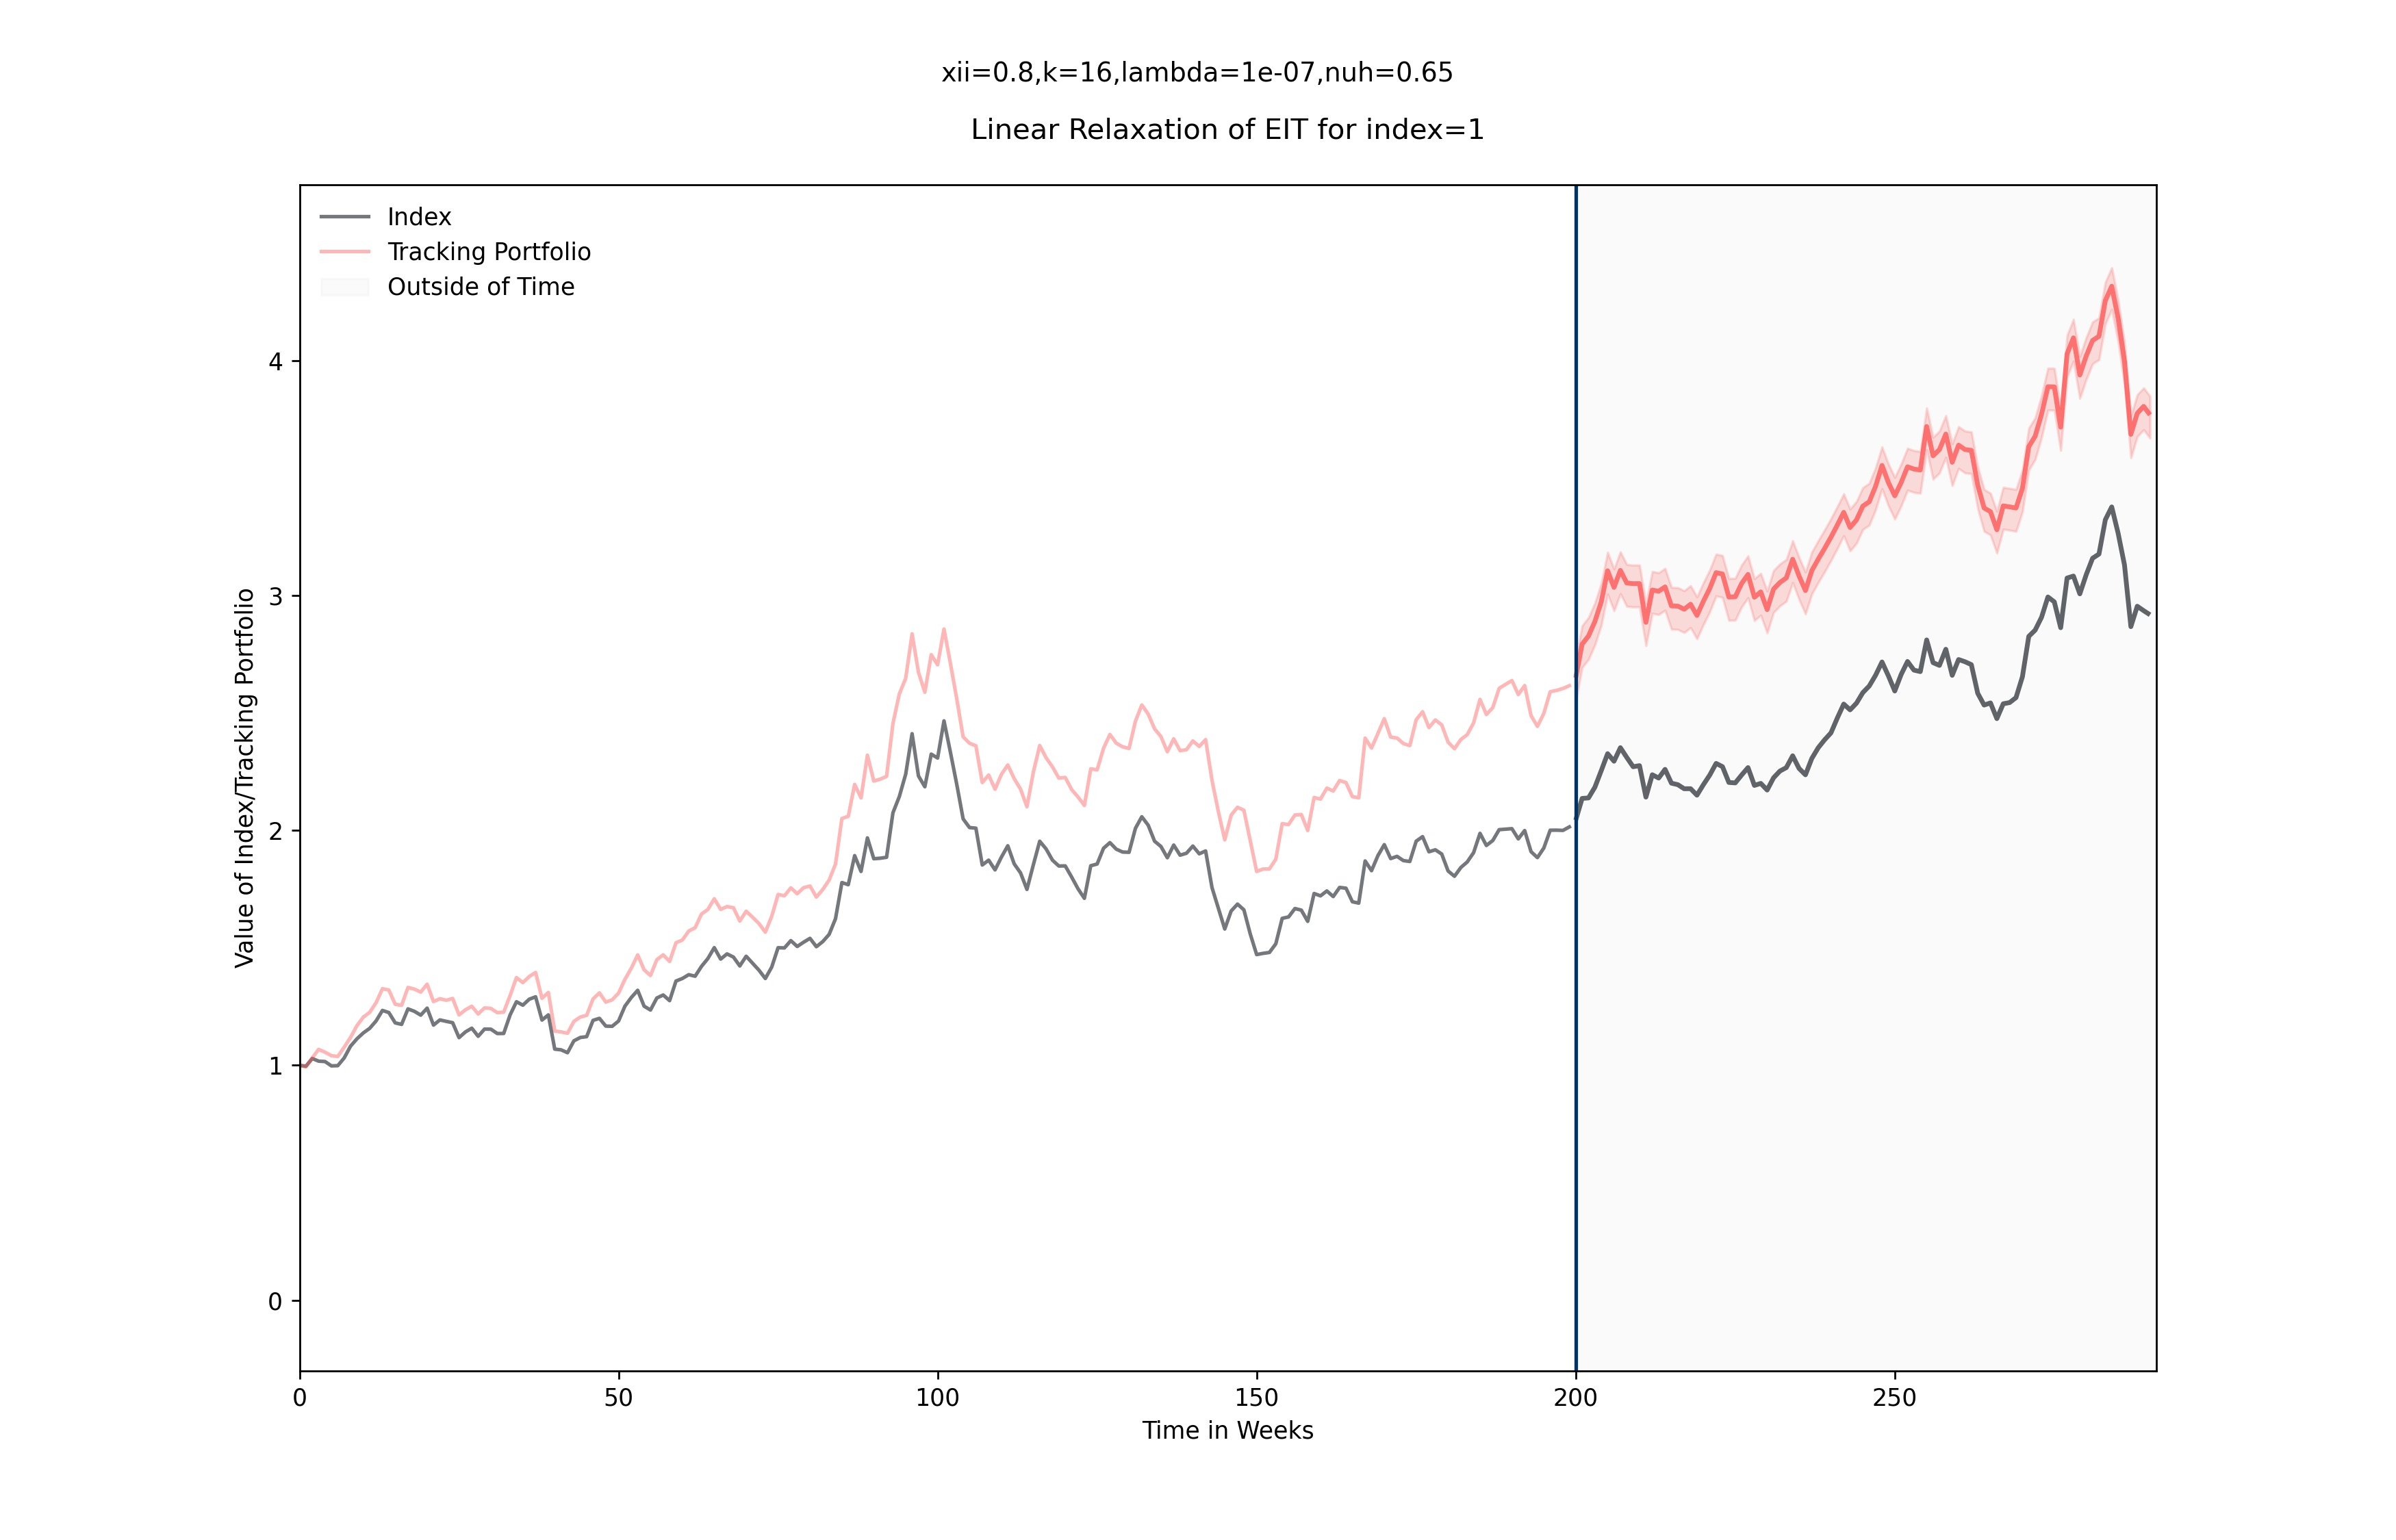

In [10]:
text_file=open(output_path+"/EIT_LP_details.txt")
lines=text_file.readlines()
failure=bool(int(lines[0][-2]))
z_lp=float(lines[1].split("=")[-1][:-2])
result_lp=pd.read_csv("result_index_{}.csv".format(file))

""" Display results of Linear Relaxation """
Image(filename='LP_EIT for index_{}.jpg'.format(file))

### Step 2: Sort Securities and create bucktes

In [15]:
from sort_and_buckets import *

# Create dummy problem using PULP
LP,q_T=dummy_problem(T,C,file)
q_T.drop("index",inplace=True)
objective=LP.objective

#Create ranked list and buckets
L=sort_securities(result_lp,q_T,objective,lamda,C) #Ranked List
kernel=L[:m]
initial_kernel=L[:m] #Create copy of Initial Kernel
buckets=create_buckets(L,m,lbuck)
Nb=len(buckets)

ModuleNotFoundError: No module named 'sort_and_buckets'